# Poster AI: Face detection using Cognitive Services
This walkthrough shows how we used cognitive services [Face API](https://azure.microsoft.com/services/cognitive-services/face/) to detect faces in an image. The API also returns various attributes such as the gender and age of each person.

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Microsoft/cognitive-services-notebooks/master?filepath=FaceAPI.ipynb)

In [1]:
from keys import api_key
subscription_key = api_key()
assert subscription_key

Prepare the POST request to the API.

In [2]:
import requests
from IPython.display import HTML

face_api_url = 'https://centralus.api.cognitive.microsoft.com/face/v1.0/detect'

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

We use the `matplotlib` library to overlay rectangles over the detected faces.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        print(face["faceAttributes"]["headPose"]) # print attributes
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")

We use the ``annotate_image`` helper function to process faces.

{'pitch': 0.0, 'roll': 2.8, 'yaw': -25.1}


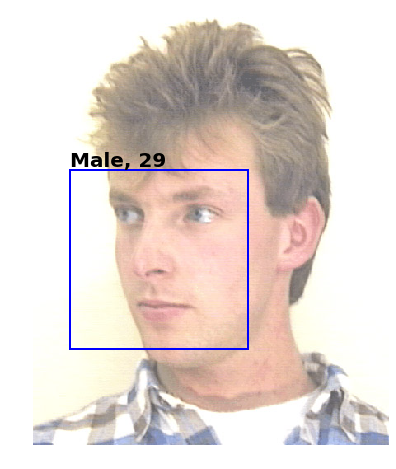

In [4]:
annotate_image("https://storage.googleapis.com/poster-ai-bucket/aberdeen-faces-dataset/andrew!45.jpg")

{'pitch': 0.0, 'roll': -0.2, 'yaw': -0.8}


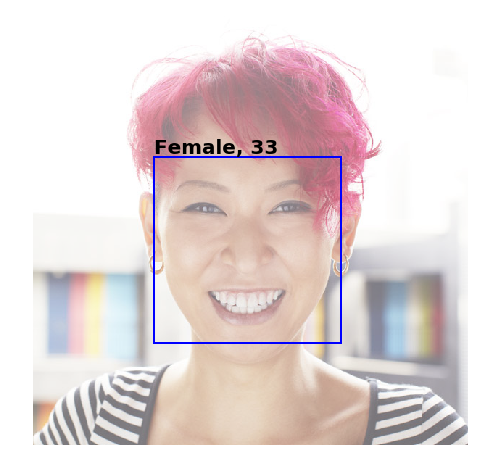

In [5]:
annotate_image("https://how-old.net/Images/faces2/main002.jpg")

{'pitch': 0.0, 'roll': -9.0, 'yaw': 22.7}
{'pitch': 0.0, 'roll': -5.2, 'yaw': 8.5}


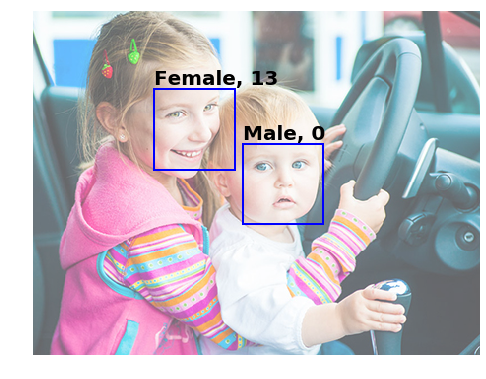

In [6]:
annotate_image("https://how-old.net/Images/faces2/main004.jpg")

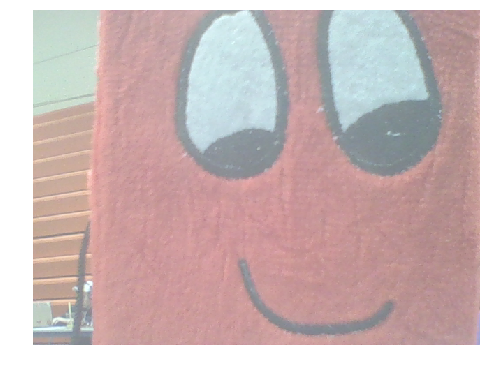

In [7]:
annotate_image("https://00e9e64bac4d17cefe613843c28eb1a79bd346c2afaa163599-apidata.googleusercontent.com/download/storage/v1/b/poster-ai-bucket/o/app%2Fc2d6a820-329e-11e9-9a22-1b53b726372b?qk=AD5uMEtAZOabQ0Osu6NMg_JSQ16mXFDgXZBsR0TdMgEF4InC_7nEzvKFgVP5ZepelVkeKSDw4OrFqRAh7lb-z6cC91mmrtHGni2PrtEiykDoYkF-W_GEaqyXXC0Kl15dK4NadgRulQW8I2xPr-Lyh1A18rDUwrmhqLzhpBLHaurakJSpBXZRaqNmZGnntiUw5ub-mv-wydh0S4S6vxMfu61PdVdx4zaKDkR96-oqsZ6xp-pk8E2JLy9-BB640EZETMQzywPv5WrwTyYx8Tre1lajaTgN9KRMbfPgoolhXHZlA58-tZ_0QzhBUykj97B7dlE03hIezS9J4vOLtNl5naf2kSSLP_wOFtkvdMDiqr2FxZuZfB0gUPncMzf3KlVLYlfUzwv_RUv0aNKCOFKDLzg0lwqtm4P0AzUR_iLTHDP9MduMvQC-JaY_yXtll4vaoikkFFIoq7W3TiCxiqTN7z_L5ITruPg-nzlASTBpaWPASkKq78405ifCw-5aBG-7h4zKS3ztTn0CvChc7WK_hgzPNV5kjEpVrZ3tK1F9asCpeEQl-byjcK-8hrnv6wG6yW5xi-SGMrEYFMSxfggJvq9mp7uRM1b0IDYD_iFmXALcxem5YrCUpU-D9P_sJg9qhjpw6DLm9fNrSvy5Le7wSg_2UDmGJIgMZS9qekzZzXgBp7goeuZ0xMAT4yQ38if1dRyCkNO4HkZEVZVvMT1o77sYhHJ-d-wjV5pDcT3Dwt_1PfrxWpM-4--G6drd2LmYNysjv4Owy3WJuNJ0Nj6g2212au4iilxMVryJV03aRU5LIyM_qcO6us7rhDxphVatL-Kg3pnM_i-8")